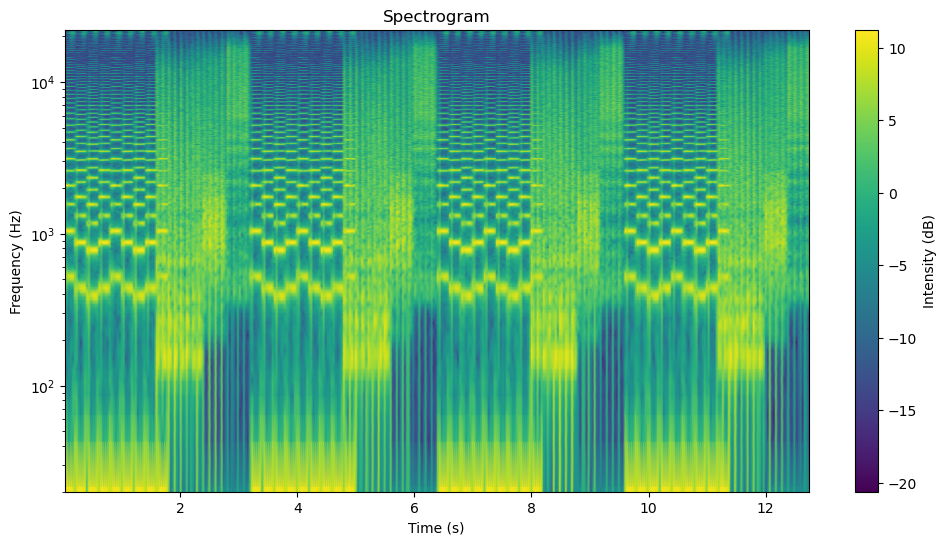

C:\Users\79258\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Savitzky-Golay filter applied.
Filtered audio saved to filtered_audio.wav

Spectrogram after noise reduction:


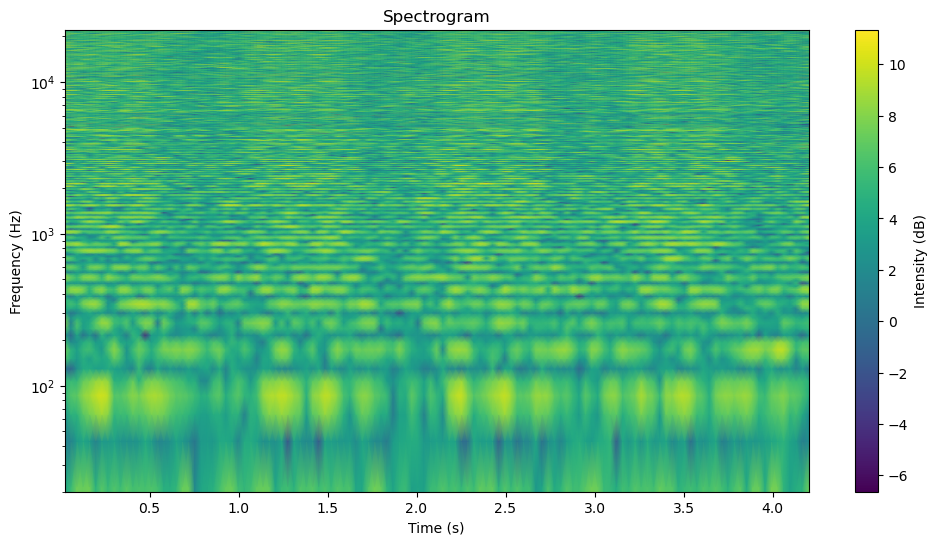

High energy moments:
Time: 4.80 s, Energy: 75.07
Time: 11.20 s, Energy: 73.15
Time: 11.00 s, Energy: 70.79
Time: 10.20 s, Energy: 70.71
Time: 8.10 s, Energy: 70.58
Time: 10.80 s, Energy: 70.49
Time: 10.00 s, Energy: 70.40
Time: 7.80 s, Energy: 70.33
Time: 1.10 s, Energy: 70.32
Time: 7.00 s, Energy: 70.21


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, windows, savgol_filter, wiener
from scipy.io import wavfile
import librosa
import librosa.display
import soundfile as sf

def create_spectrogram(audio_file, window='hann', n_fft=2048, hop_length=512, log_scale=True):
    try:
        sample_rate, audio_data = wavfile.read(audio_file)
        if len(audio_data.shape) > 1:
            audio_data = audio_data[:, 0]
    except Exception as e:
        print(f"Error reading file: {e}. Trying librosa.")
        try:
            audio_data, sample_rate = librosa.load(audio_file, sr=None)
        except Exception as e2:
            print(f"Error with librosa: {e2}.")
            return

    window_func = windows.get_window(window, n_fft)

    frequencies, times, spectrogram_data = spectrogram(
        audio_data,
        fs=sample_rate,
        window=window_func,
        nperseg=n_fft,
        noverlap=hop_length,
        detrend=False
    )

    if log_scale:
        spectrogram_data = np.log(spectrogram_data + 1e-9)

    plt.figure(figsize=(12, 6))
    plt.pcolormesh(times, frequencies, spectrogram_data, shading='gouraud')
    plt.colorbar(label='Intensity (dB)')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    if log_scale:
        plt.yscale('log')

    plt.ylim(20, sample_rate / 2)
    plt.savefig("spectrogram.png")
    plt.show()

    return sample_rate, audio_data, spectrogram_data, frequencies, times

def noise_reduction(audio_data, sample_rate, spectrogram_data, frequencies, times, method='wiener'):
    if method == 'wiener':
        filtered_audio = wiener(audio_data)
        print("Wiener filter applied.")

    elif method == 'savgol':
        filtered_spectrogram = savgol_filter(spectrogram_data, window_length=15, polyorder=3, axis=1)
        filtered_audio = librosa.istft(filtered_spectrogram, hop_length=512)
        print("Savitzky-Golay filter applied.")

    else:
        print("Unknown method.")
        return audio_data

    filtered_audio = np.int16(filtered_audio / np.max(np.abs(filtered_audio)) * 32767)

    sf.write("filtered_audio.wav", filtered_audio, sample_rate)
    print("Filtered audio saved to filtered_audio.wav")

    return filtered_audio

def find_high_energy_moments(spectrogram_data, times, frequencies, delta_t=0.1, delta_f=45):
    high_energy_moments = []
    num_time_windows = int(times[-1] / delta_t)

    for i in range(num_time_windows):
        start_time = i * delta_t
        end_time = start_time + delta_t

        time_indices = np.where((times >= start_time) & (times < end_time))[0]
        freq_indices = np.where(frequencies <= delta_f)[0]

        spectrogram_subset = spectrogram_data[freq_indices[:, None], time_indices]
        total_energy = np.sum(spectrogram_subset)

        high_energy_moments.append((start_time, total_energy))

    high_energy_moments.sort(key=lambda x: x[1], reverse=True)

    print("High energy moments:")
    for time, energy in high_energy_moments[:10]:
        print(f"Time: {time:.2f} s, Energy: {energy:.2f}")

    return high_energy_moments

def main():
    audio_file = "baraban.wav"
    sample_rate, audio_data, spectrogram_data, frequencies, times = create_spectrogram(audio_file, log_scale=True)
    filtered_audio = noise_reduction(audio_data, sample_rate, spectrogram_data, frequencies, times, method='savgol')
    print("\nSpectrogram after noise reduction:")
    create_spectrogram("filtered_audio.wav", log_scale=True)
    high_energy_moments = find_high_energy_moments(spectrogram_data, times, frequencies)

if __name__ == "__main__":
    main()

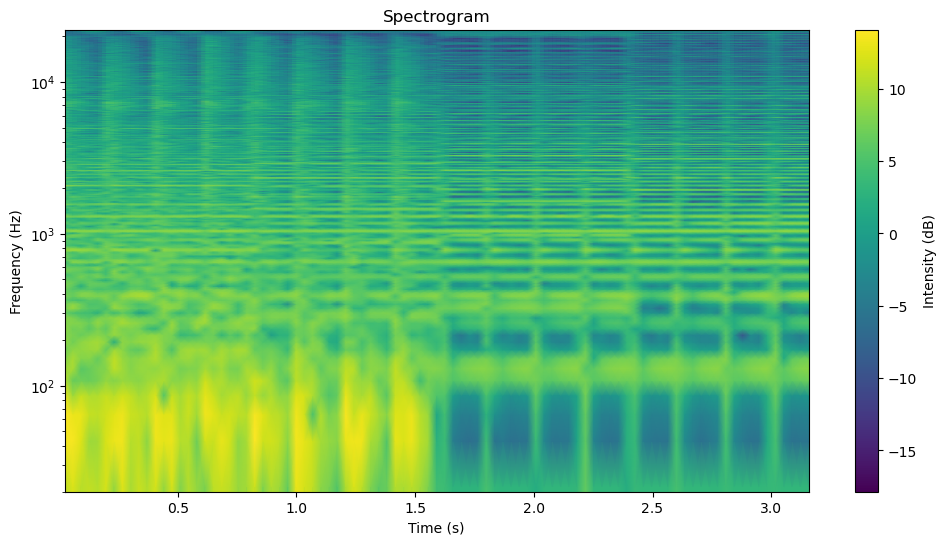

Wiener filter applied.
Filtered audio saved to filtered_audio.wav

Spectrogram after noise reduction:


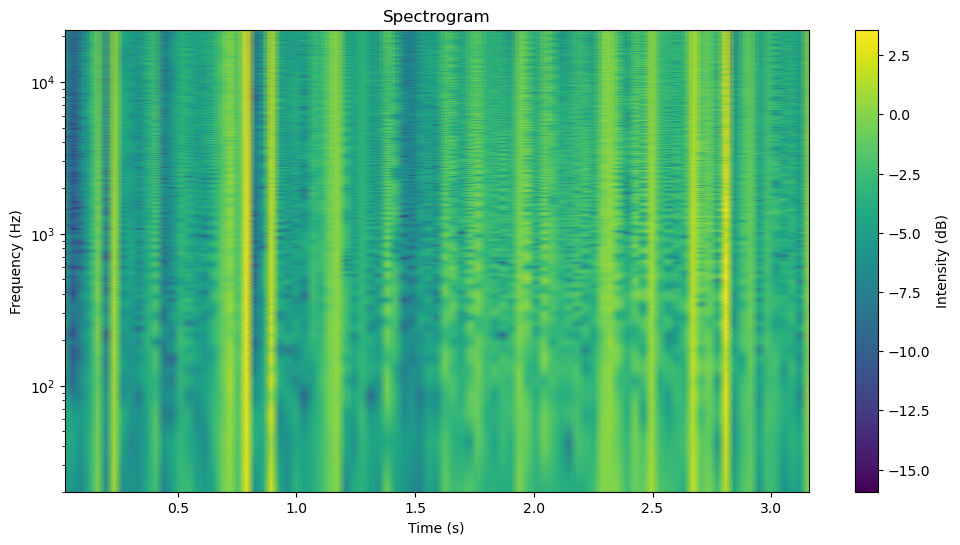

High energy moments:
Time: 0.40 s, Energy: 101.63
Time: 0.00 s, Energy: 101.16
Time: 0.10 s, Energy: 99.15
Time: 0.60 s, Energy: 95.89
Time: 0.30 s, Energy: 95.84
Time: 1.20 s, Energy: 95.37
Time: 1.40 s, Energy: 88.61
Time: 0.50 s, Energy: 84.98
Time: 0.80 s, Energy: 83.04
Time: 0.70 s, Energy: 82.46


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, windows, savgol_filter, wiener
from scipy.io import wavfile
import librosa
import librosa.display
import soundfile as sf

def create_spectrogram(audio_file, window='hann', n_fft=2048, hop_length=512, log_scale=True):
    try:
        sample_rate, audio_data = wavfile.read(audio_file)
        if len(audio_data.shape) > 1:
            audio_data = audio_data[:, 0]
    except Exception as e:
        print(f"Error reading file: {e}. Trying librosa.")
        try:
            audio_data, sample_rate = librosa.load(audio_file, sr=None)
        except Exception as e2:
            print(f"Error with librosa: {e2}.")
            return

    window_func = windows.get_window(window, n_fft)

    frequencies, times, spectrogram_data = spectrogram(
        audio_data,
        fs=sample_rate,
        window=window_func,
        nperseg=n_fft,
        noverlap=hop_length,
        detrend=False
    )

    if log_scale:
        spectrogram_data = np.log(spectrogram_data + 1e-9)

    plt.figure(figsize=(12, 6))
    plt.pcolormesh(times, frequencies, spectrogram_data, shading='gouraud')
    plt.colorbar(label='Intensity (dB)')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    if log_scale:
        plt.yscale('log')

    plt.ylim(20, sample_rate / 2)
    plt.savefig("spectrogram.png")
    plt.show()

    return sample_rate, audio_data, spectrogram_data, frequencies, times

def noise_reduction(audio_data, sample_rate, spectrogram_data, frequencies, times, method='wiener'):
    if method == 'wiener':
        filtered_audio = wiener(audio_data)
        print("Wiener filter applied.")

    elif method == 'savgol':
        filtered_spectrogram = savgol_filter(spectrogram_data, window_length=15, polyorder=3, axis=1)
        filtered_audio = librosa.istft(filtered_spectrogram, hop_length=512)
        print("Savitzky-Golay filter applied.")

    else:
        print("Unknown method.")
        return audio_data

    filtered_audio = np.int16(filtered_audio / np.max(np.abs(filtered_audio)) * 32767)

    sf.write("filtered_audio.wav", filtered_audio, sample_rate)
    print("Filtered audio saved to filtered_audio.wav")

    return filtered_audio

def find_high_energy_moments(spectrogram_data, times, frequencies, delta_t=0.1, delta_f=45):
    high_energy_moments = []
    num_time_windows = int(times[-1] / delta_t)

    for i in range(num_time_windows):
        start_time = i * delta_t
        end_time = start_time + delta_t

        time_indices = np.where((times >= start_time) & (times < end_time))[0]
        freq_indices = np.where(frequencies <= delta_f)[0]

        spectrogram_subset = spectrogram_data[freq_indices[:, None], time_indices]
        total_energy = np.sum(spectrogram_subset)

        high_energy_moments.append((start_time, total_energy))

    high_energy_moments.sort(key=lambda x: x[1], reverse=True)

    print("High energy moments:")
    for time, energy in high_energy_moments[:10]:
        print(f"Time: {time:.2f} s, Energy: {energy:.2f}")

    return high_energy_moments

def main():
    audio_file = "sound.wav"
    sample_rate, audio_data, spectrogram_data, frequencies, times = create_spectrogram(audio_file, log_scale=True)
    filtered_audio = noise_reduction(audio_data, sample_rate, spectrogram_data, frequencies, times, method='wiener')
    print("\nSpectrogram after noise reduction:")
    create_spectrogram("filtered_audio.wav", log_scale=True)
    high_energy_moments = find_high_energy_moments(spectrogram_data, times, frequencies)

if __name__ == "__main__":
    main()